# Analiza rezultata treniranja

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import sys
import torch
sys.path.insert(0,'../src/')
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

In [3]:
colors = ['#465BBB', '#3F8FCE', '#7ABBCE', '#3A3865', '#A82F43', '#612A37', '#DC5433', '#F29457']
b1 = '#465BBB'
b2 = '#3F8FCE'
b3 = '#7ABBCE'
b4 = '#3A3865'
black1 = '#22212A'
black2 = '#2D1E21'
or1 = '#A82F43'
or2 = '#612A37'
or3 = '#DC5433'
or4 = '#F29457'
muted_colors = sns.set_palette(sns.color_palette(colors))


In [4]:
fm.get_font_names()

['DejaVu Serif',
 'STIXNonUnicode',
 'cmsy10',
 'cmmi10',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Sans Display',
 'STIXSizeFiveSym',
 'cmex10',
 'cmss10',
 'STIXSizeOneSym',
 'DejaVu Serif Display',
 'cmtt10',
 'cmb10',
 'STIXSizeFourSym',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'cmr10']

In [5]:
# Set up your font properties (optional)
font = fm.FontProperties()
font.set_family('serif')
font.set_name('DejaVu Sans Mono')  # Times font
sns.set(font="DejaVu Sans Mono")

%matplotlib inline 

# 32 EPOHA je izabrana zato sto nakon nje model pocinje blago pretrenirati

## 1. Ciklus

In [6]:
results_run1 = pickle.load(open("/teamspace/studios/this_studio/galaxy_morph/output/run1_02/results_runs_bench_final_true.pkl", "rb"))
results_class_run1 = pickle.load(open("/teamspace/studios/this_studio/galaxy_morph/output/run1_02/results_runs_class_bench_final_true.pkl", "rb"))

In [7]:
train_loss_run1 = [results_run1[i][0] for i in results_run1]
train_acc_run1 = [results_run1[i][1] for i in results_run1]
train_prec_run1 = [results_run1[i][2] for i in results_run1]
train_recall_run1 = [results_run1[i][3] for i in results_run1]
train_F1_run1 = [results_run1[i][4] for i in results_run1]

valid_loss_run1 = [results_run1[i][5] for i in results_run1]
valid_acc_run1 = [results_run1[i][6] for i in results_run1]
valid_prec_run1 = [results_run1[i][7] for i in results_run1]
valid_recall_run1 = [results_run1[i][8] for i in results_run1]
valid_F1_run1 = [results_run1[i][9] for i in results_run1]

train_prec_class_run1 = [results_class_run1[i][3] for i in results_class_run1]
train_recall_class_run1 = [results_class_run1[i][4] for i in results_class_run1]
train_F1_class_run1 = [results_class_run1[i][5] for i in results_class_run1]

valid_prec_class_run1 = [results_class_run1[i][9] for i in results_class_run1]
valid_recall_class_run1 = [results_class_run1[i][10] for i in results_class_run1]
valid_F1_class_run1 = [results_class_run1[i][11] for i in results_class_run1]

valid_probs_run1 = [results_class_run1[i][6] for i in results_class_run1]
valid_true_run1 = [results_class_run1[i][7] for i in results_class_run1]
valid_ids_run1 = [results_class_run1[i][8] for i in results_class_run1]

---

In [8]:
per_class = pd.DataFrame()

vprec_class = valid_prec_class_run1[32]
vrecall_class = valid_recall_class_run1[32]
vf1_class = valid_F1_class_run1[32]
tprec_class = train_prec_class_run1[32]
trecall_class = train_recall_class_run1[32]
tf1_class = train_F1_class_run1[32]

per_class['Preciznost (U)'] = vprec_class
per_class['Osjetljivost (U)'] = vrecall_class
per_class['F1 mjera (U)'] = vf1_class

per_class['Preciznost (V)'] = tprec_class
per_class['Osjetjlivost (V)'] = trecall_class
per_class['F1 mjera (V)'] = tf1_class

per_class

,Preciznost (U),Osjetljivost (U),F1 mjera (U),Preciznost (V),Osjetjlivost (V),F1 mjera (V)
0,0.835098,0.825112,0.830075,0.897582,0.882875,0.890168
1,0.863460,0.908951,0.885622,0.916714,0.941475,0.928930
2,0.868475,0.838025,0.852978,0.915342,0.911369,0.913352


In [9]:
predicted = np.argmax(valid_probs_run1[32], axis=1)
predicted[:4]

array([0, 1, 1, 0])

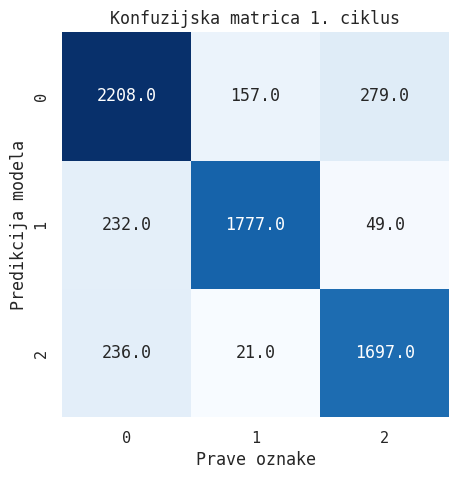

In [10]:
ct = pd.crosstab(predicted,  valid_true_run1[32], rownames=["Predikcija modela"], colnames=["Prave oznake"])
plt.figure(figsize=(5,5))
sns.heatmap(ct, cmap="Blues", annot=True, xticklabels="012", yticklabels="012", fmt=".1f", cbar=False)
plt.title("Konfuzijska matrica 1. ciklus",fontproperties=font, fontsize=12)
plt.savefig('../images/confusion_matrix_1_valid.png',dpi=300, bbox_inches = 'tight')
plt.show()

In [31]:
valid_probs_array = np.array(valid_probs_run1[32])

max_probs = (np.max(valid_probs_array, axis=1), np.argmax(valid_probs_array, axis=1))

class_probs_run1 = pd.DataFrame()
class_probs_run1['Vjerojatnost'] = max_probs[0]
class_probs_run1['Predikcija'] = max_probs[1]
class_probs_run1['Oznaka'] = valid_true_run1[32]

class_probs_run1['Točno'] = np.where(class_probs_run1['Predikcija'] == class_probs_run1['Oznaka'], 1, 0)

print(sum(class_probs_run1['Točno'])/class_probs_run1.shape[0])

0.8536658653846154


In [23]:
class_probs_run1.head()

,Vjerojatnost,Predikcija,Oznaka,Correct
0,0.964844,0,1,0
1,0.619629,1,0,0
2,0.956055,1,1,1
3,0.999023,0,0,1
4,0.999512,0,0,1


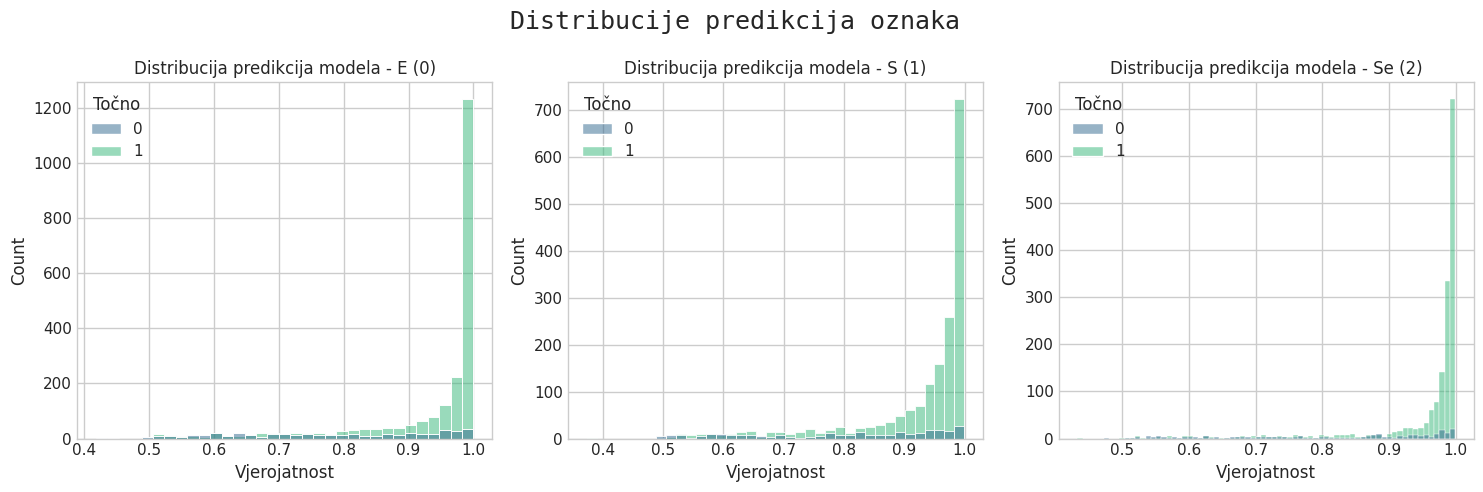

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.style.use('seaborn-v0_8-whitegrid')
fig.suptitle("Distribucije predikcija oznaka ", fontproperties=font, fontsize=18)

sns.histplot(class_probs_run1[class_probs_run1['Predikcija'] == 0], x='Vjerojatnost', hue='Točno', ax=axes[0], palette="viridis")
axes[0].set_title('Distribucija predikcija modela - E (0)')

sns.histplot(class_probs_run1[class_probs_run1['Predikcija'] == 1], x='Vjerojatnost', hue='Točno', ax=axes[1], palette="viridis")
axes[1].set_title('Distribucija predikcija modela - S (1)')

sns.histplot(class_probs_run1[class_probs_run1['Predikcija'] == 2], x='Vjerojatnost', hue='Točno', ax=axes[2], palette="viridis")
axes[2].set_title('Distribucija predikcija modela - Se (2)')

plt.tight_layout()
plt.savefig("../images/distribucija_run1.png", dpi=300, bbox_inches = 'tight')
plt.show()

---

# 2. Ciklus

In [39]:
results_run2 = pickle.load(open("/teamspace/studios/this_studio/galaxy_morph/output/run2_02/results_runs_bench_final_true.pkl", "rb"))
results_class_run2 = pickle.load(open("/teamspace/studios/this_studio/galaxy_morph/output/run2_02/results_runs_class_bench_final_true.pkl", "rb"))

In [40]:
train_loss_run2 = [results_run2[i][0] for i in results_run2]
train_acc_run2 = [results_run2[i][1] for i in results_run2]
train_prec_run2 = [results_run2[i][2] for i in results_run2]
train_recall_run2 = [results_run2[i][3] for i in results_run2]
train_F1_run2 = [results_run2[i][4] for i in results_run2]
valid_loss_run2 = [results_run2[i][5] for i in results_run2]
valid_acc_run2 = [results_run2[i][6] for i in results_run2]
valid_prec_run2 = [results_run2[i][7] for i in results_run2]
valid_recall_run2 = [results_run2[i][8] for i in results_run2]
valid_F1_run2 = [results_run2[i][9] for i in results_run2]

train_prec_class_run2 = [results_class_run2[i][3] for i in results_class_run2]
train_recall_class_run2 = [results_class_run2[i][4] for i in results_class_run2]
train_F1_class_run2 = [results_class_run2[i][5] for i in results_class_run2]

valid_prec_class_run2 = [results_class_run2[i][9] for i in results_class_run2]
valid_recall_class_run2 = [results_class_run2[i][10] for i in results_class_run2]
valid_F1_class_run2 = [results_class_run2[i][11] for i in results_class_run2]

valid_probs_run2 = [results_class_run2[i][6] for i in results_class_run2]
valid_true_run2 = [results_class_run2[i][7] for i in results_class_run2]
valid_ids_run2 = [results_class_run2[i][8] for i in results_class_run2]

In [41]:
per_class2 = pd.DataFrame()

vprec_class2 = valid_prec_class_run2[32]
vrecall_class2 = valid_recall_class_run2[32]
vf1_class2 = valid_F1_class_run2[32]
tprec_class2 = train_prec_class_run2[32]
trecall_class2 = train_recall_class_run2[32]
tf1_class2 = train_F1_class_run2[32]

per_class2['Preciznost (U)'] = vprec_class2
per_class2['Osjetljivost (U)'] = vrecall_class2
per_class2['F1 mjera (U)'] = vf1_class2

per_class2['Preciznost (V)'] = tprec_class2
per_class2['Osjetjlivost (V)'] = trecall_class2
per_class2['F1 mjera (V)'] = tf1_class2

per_class2

,Preciznost (U),Osjetljivost (U),F1 mjera (U),Preciznost (V),Osjetjlivost (V),F1 mjera (V)
0,0.795127,0.801339,0.798221,0.867023,0.874722,0.870856
1,0.689379,0.770437,0.727657,0.795002,0.796766,0.795883
2,0.666265,0.616499,0.640417,0.714150,0.716413,0.715280
3,0.687140,0.723232,0.704724,0.777967,0.781295,0.779627
4,0.651982,0.594975,0.622176,0.716758,0.709392,0.713056
5,0.612132,0.671371,0.640385,0.744029,0.692900,0.717555
6,0.762120,0.680765,0.719149,0.777987,0.826112,0.801327


In [42]:
predicted2 = np.argmax(valid_probs_run2[32], axis=1)
predicted2[:4]

array([4, 1, 4, 0])

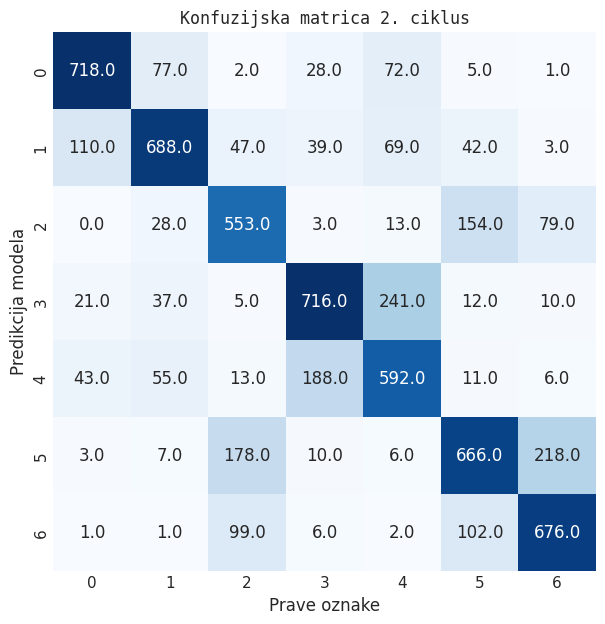

In [43]:
ct = pd.crosstab(predicted2,  valid_true_run2[32], rownames=["Predikcija modela"], colnames=["Prave oznake"])
plt.figure(figsize=(7,7))
sns.heatmap(ct, cmap="Blues", annot=True, xticklabels="0123456", yticklabels="0123456", fmt=".1f", cbar=False)
plt.title("Konfuzijska matrica 2. ciklus",fontproperties=font, fontsize=12)
plt.savefig('../images/confusion_matrix_2_valid.png',dpi=300, bbox_inches = 'tight')
plt.show()

In [44]:
valid_probs_array2 = np.array(valid_probs_run2[32])

max_probs2 = (np.max(valid_probs_array2, axis=1), np.argmax(valid_probs_array2, axis=1))

class_probs_run2 = pd.DataFrame()
class_probs_run2['Vjerojatnost'] = max_probs2[0]
class_probs_run2['Predikcija'] = max_probs2[1]
class_probs_run2['Oznaka'] = valid_true_run2[32]

class_probs_run2['Točno'] = np.where(class_probs_run2['Predikcija'] == class_probs_run2['Oznaka'], 1, 0)

print(sum(class_probs_run2['Točno'])/class_probs_run2.shape[0])

0.6924579326923077


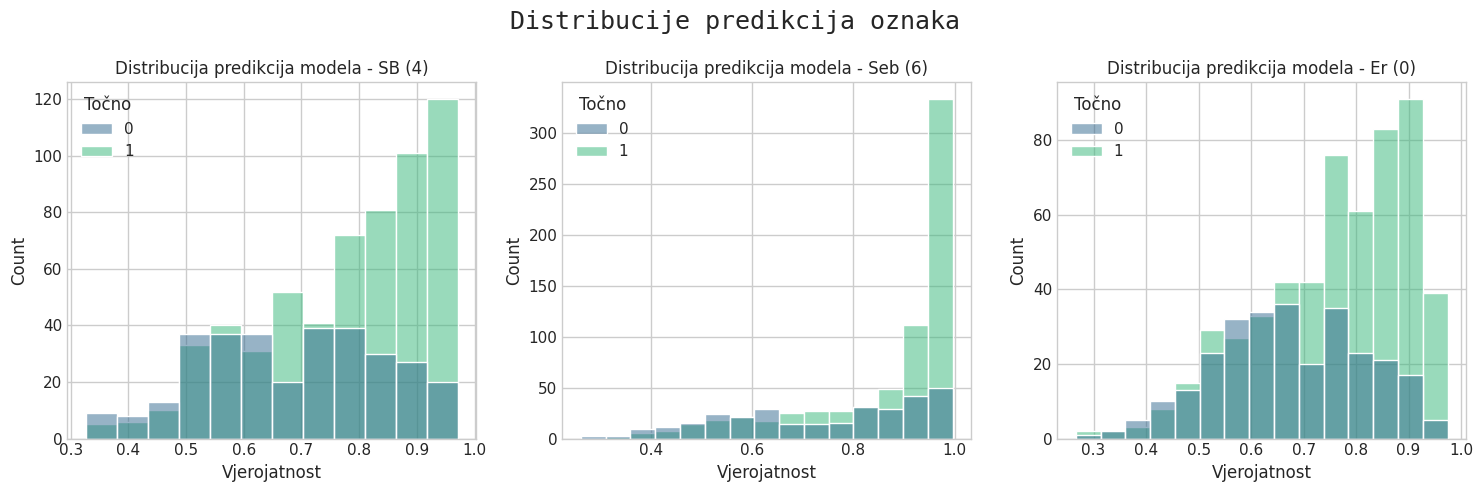

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.style.use('seaborn-v0_8-whitegrid')
fig.suptitle("Distribucije predikcija oznaka ", fontproperties=font, fontsize=18)

sns.histplot(class_probs_run2[class_probs_run2['Predikcija'] == 4], x='Vjerojatnost', hue='Točno', ax=axes[0], palette="viridis")
axes[0].set_title('Distribucija predikcija modela - SB (4)')

sns.histplot(class_probs_run2[class_probs_run2['Predikcija'] == 1], x='Vjerojatnost', hue='Točno', ax=axes[1], palette="viridis")
axes[1].set_title('Distribucija predikcija modela - Seb (6)')

sns.histplot(class_probs_run2[class_probs_run2['Predikcija'] == 2], x='Vjerojatnost', hue='Točno', ax=axes[2], palette="viridis")
axes[2].set_title('Distribucija predikcija modela - Er (0)')

plt.tight_layout()
plt.savefig("../images/distribucija_run2.png", dpi=300, bbox_inches = 'tight')
plt.show()

---

# Klasični model

In [46]:
results_benchmark = pickle.load(open("/teamspace/studios/this_studio/galaxy_morph/output/benchmark/results_runs_bench_final_true.pkl", "rb"))
results_class_benchmark = pickle.load(open("/teamspace/studios/this_studio/galaxy_morph/output/benchmark/results_runs_class_bench_final_true.pkl", "rb"))

In [47]:
train_loss_benchmark = [results_benchmark[i][0] for i in results_benchmark]
train_acc_benchmark = [results_benchmark[i][1] for i in results_benchmark]
train_prec_benchmark = [results_benchmark[i][2] for i in results_benchmark]
train_recall_benchmark = [results_benchmark[i][3] for i in results_benchmark]
train_F1_benchmark = [results_benchmark[i][4] for i in results_benchmark]
valid_loss_benchmark = [results_benchmark[i][5] for i in results_benchmark]
valid_acc_benchmark = [results_benchmark[i][6] for i in results_benchmark]
valid_prec_benchmark = [results_benchmark[i][7] for i in results_benchmark]
valid_recall_benchmark = [results_benchmark[i][8] for i in results_benchmark]
valid_F1_benchmark = [results_benchmark[i][9] for i in results_benchmark]

train_prec_class_benchmark = [results_class_benchmark[i][3] for i in results_class_benchmark]
train_recall_class_benchmark = [results_class_benchmark[i][4] for i in results_class_benchmark]
train_F1_class_benchmark = [results_class_benchmark[i][5] for i in results_class_benchmark]

valid_prec_class_benchmark = [results_class_benchmark[i][9] for i in results_class_benchmark]
valid_recall_class_benchmark = [results_class_benchmark[i][10] for i in results_class_benchmark]
valid_F1_class_benchmark = [results_class_benchmark[i][11] for i in results_class_benchmark]

valid_probs_benchmark = [results_class_benchmark[i][6] for i in results_class_benchmark]
valid_true_benchmark = [results_class_benchmark[i][7] for i in results_class_benchmark]
valid_ids_benchmark = [results_class_benchmark[i][8] for i in results_class_benchmark]

In [48]:
per_class_benchmark = pd.DataFrame()

vprec_class_benchmark = valid_prec_class_benchmark[32]
vrecall_class_benchmark = valid_recall_class_benchmark[32]
vf1_class_benchmark = valid_F1_class_benchmark[32]
tprec_class_benchmark = train_prec_class_benchmark[32]
trecall_class_benchmark = train_recall_class_benchmark[32]
tf1_class_benchmark = train_F1_class_benchmark[32]

per_class_benchmark['Preciznost (U)'] = vprec_class_benchmark
per_class_benchmark['Osjetljivost (U)'] = vrecall_class_benchmark
per_class_benchmark['F1 mjera (U)'] = vf1_class_benchmark

per_class_benchmark['Preciznost (V)'] = tprec_class_benchmark
per_class_benchmark['Osjetjlivost (V)'] = trecall_class_benchmark
per_class_benchmark['F1 mjera (V)'] = tf1_class_benchmark

per_class_benchmark

,Preciznost (U),Osjetljivost (U),F1 mjera (U),Preciznost (V),Osjetjlivost (V),F1 mjera (V)
0,0.722328,0.844866,0.778807,0.743058,0.773507,0.757977
1,0.716033,0.590146,0.647023,0.647987,0.612821,0.629914
2,0.608445,0.706800,0.653945,0.577557,0.590591,0.584001
3,0.631633,0.625253,0.628426,0.619088,0.629545,0.624273
4,0.581485,0.606030,0.593504,0.567770,0.564682,0.566222
5,0.629471,0.443548,0.520402,0.552623,0.479805,0.513646
6,0.695691,0.780463,0.735643,0.671377,0.746358,0.706885


In [49]:
predicted_bench = np.argmax(valid_probs_benchmark[32], axis=1)
predicted_bench[:4]

array([4, 1, 4, 0])

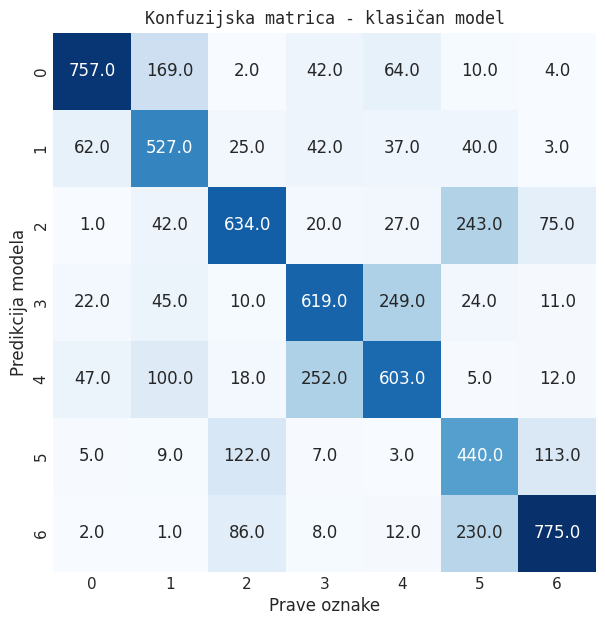

In [50]:
ct = pd.crosstab(predicted_bench,  valid_true_benchmark[32], rownames=["Predikcija modela"], colnames=["Prave oznake"])
plt.figure(figsize=(7,7))
sns.heatmap(ct, cmap="Blues", annot=True, xticklabels="0123456", yticklabels="0123456", fmt=".1f", cbar=False)
plt.title("Konfuzijska matrica - klasičan model",fontproperties=font, fontsize=12)
plt.savefig('../images/confusion_matrix_bench_valid.png',dpi=300, bbox_inches = 'tight')

plt.show()

In [51]:
valid_probs_array = np.array(valid_probs_run2[32])

max_probs = (np.max(valid_probs_array, axis=1), np.argmax(valid_probs_array, axis=1))

class_probs = pd.DataFrame()
class_probs['Vjerojatnost'] = max_probs[0]
class_probs['Predikcija'] = max_probs[1]
class_probs['Oznaka'] = valid_true_run2[32]

class_probs['Točno'] = np.where(class_probs['Predikcija'] == class_probs['Oznaka'], 1, 0)

print(sum(class_probs['Točno'])/class_probs.shape[0])

0.6924579326923077


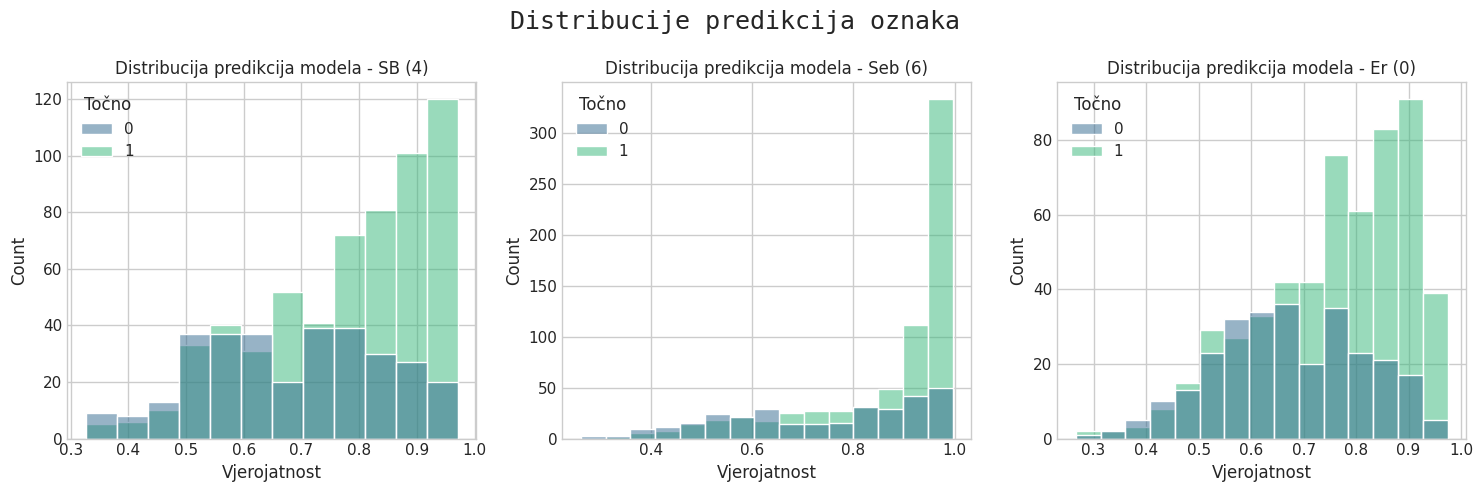

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.style.use('seaborn-v0_8-whitegrid')
fig.suptitle("Distribucije predikcija oznaka ", fontproperties=font, fontsize=18)

sns.histplot(class_probs[class_probs['Predikcija'] == 4], x='Vjerojatnost', hue='Točno', ax=axes[0], palette="viridis")
axes[0].set_title('Distribucija predikcija modela - SB (4)')

sns.histplot(class_probs[class_probs['Predikcija'] == 1], x='Vjerojatnost', hue='Točno', ax=axes[1], palette="viridis")
axes[1].set_title('Distribucija predikcija modela - Seb (6)')

sns.histplot(class_probs[class_probs['Predikcija'] == 2], x='Vjerojatnost', hue='Točno', ax=axes[2], palette="viridis")
axes[2].set_title('Distribucija predikcija modela - Er (0)')

plt.tight_layout()
plt.savefig("../images/distribucija_bench.png", dpi=300, bbox_inches = 'tight')
plt.show()

---

## plotovi metrika

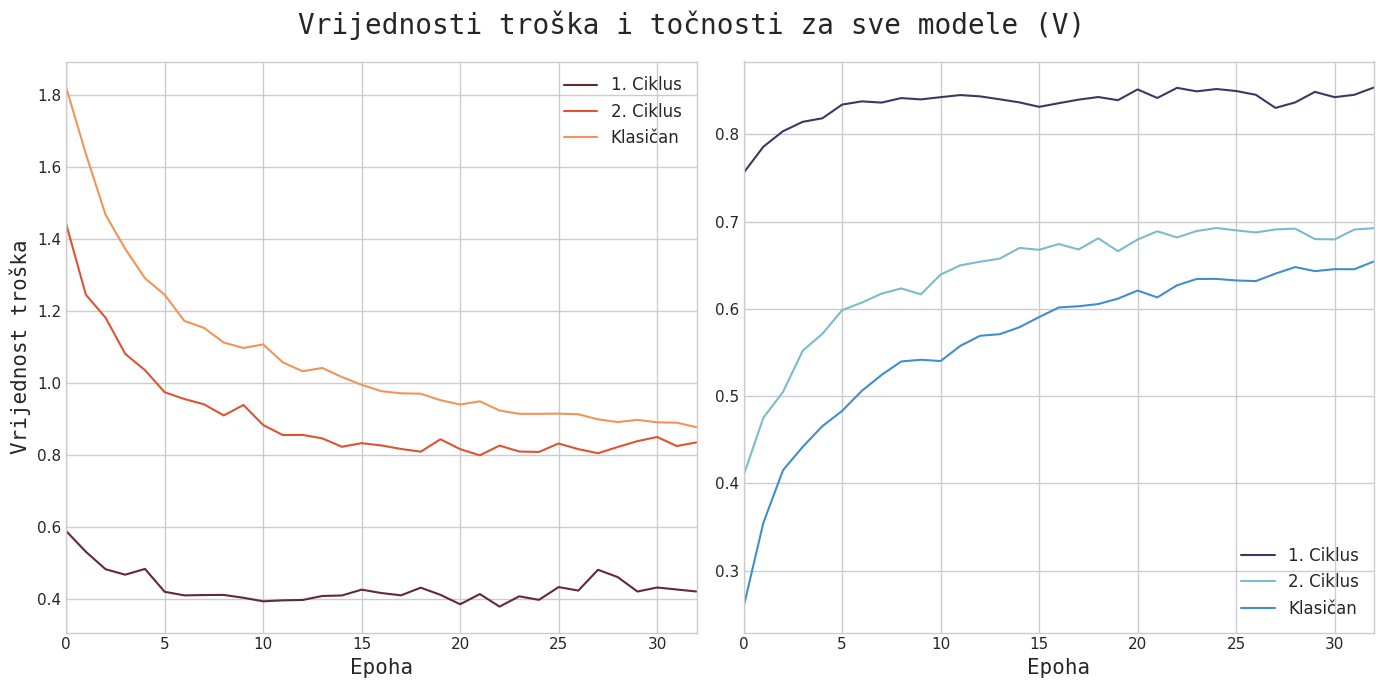

In [55]:
fig, ax = plt.subplots(1,2, figsize=(14,7))
plt.style.use('seaborn-v0_8-whitegrid')
fig.suptitle("Vrijednosti troška i točnosti za sve modele (V)", fontproperties=font, fontsize=20)

ax[0].set_xlim([0,32])
ax[0].plot(valid_loss_run1[:33], color=or2, label="1. Ciklus")
ax[0].plot(valid_loss_run2[:33], color=or3, label="2. Ciklus")
ax[0].plot(valid_loss_benchmark[:33], color=or4, label="Klasičan")
ax[0].set_xlabel("Epoha", fontproperties=font, fontsize=15)
ax[0].set_ylabel("Vrijednost troška", fontproperties=font, fontsize=15)

ax[1].set_xlim([0,32])
ax[1].plot(valid_acc_run1[:33], color=b4, label="1. Ciklus")
ax[1].plot(valid_acc_run2[:33], color=b3, label="2. Ciklus")
ax[1].plot(valid_acc_benchmark[:33], color=b2, label="Klasičan")
ax[1].set_xlabel("Epoha", fontproperties=font, fontsize=15)

ax[0].legend(fontsize=12, fancybox=True, facecolor="white")
ax[1].legend(fontsize=12, fancybox=True, facecolor="white")

fig.tight_layout()
plt.savefig('../images/training_loop.png',dpi=300, bbox_inches = 'tight')

plt.show()

---

In [6]:
from datap_efficient_bench import *
import model_train_benchmark as trb
from labeling_system import *
import cvt_benchmark_attn as cvtb

In [17]:
main_runs = pd.read_csv('../input/main_runs.csv')
# ------

soft_label_dict_run1 = create_label_dict1(main_runs)
soft_label_dict_run2 = create_label_dict2(main_runs)

soft_run1_conf, soft_run1_spur = section_spurious(soft_label_dict_run1, num=3)
soft_run2_conf, soft_run2_spur = section_spurious(soft_label_dict_run2, num=7)

hard_run1_conf = create_hard_labels(soft_run1_conf)
hard_run2_conf = create_hard_labels(soft_run2_conf)

print(Counter(list(hard_run1_conf.values())))
print(Counter(list(hard_run2_conf.values())))

imgs_path = '../input/images_gz2/images/'
W, H, C = 224, 224, 4

conf_file_list = create_file_list(imgs_path, soft_run1_conf, soft_run2_conf)

n = 5000
bs = 64
embed_size = 64
device= 'cuda' if torch.cuda.is_available() else 'cpu'

images_orig, labels_orig = data_setup(conf_file_list, hard_run2_conf, n)
traino, valido, testo, y_traino, y_valido, y_testo = split_data(images_orig, labels_orig)

train_iter, valid_iter, test_iter = create_dali_iterators(traino, valido, testo, hard_run2_conf, bs)

Counter({0: 130557, 1: 56602, 2: 17603})
Counter({1: 69767, 0: 58485, 4: 51702, 5: 14903, 3: 13821, 2: 9566, 6: 6043})
Counter({1: 63971, 0: 57249, 4: 44374, 3: 12825, 5: 12442, 2: 7602, 6: 5025})
[('../input/images_gz2/images/100.jpg', 0), ('../input/images_gz2/images/1000.jpg', 0), ('../input/images_gz2/images/10000.jpg', 1), ('../input/images_gz2/images/100000.jpg', 5)]
57249 63971 7602 12825 44374 12442 5025
23450 6632 3418
['../input/images_gz2/images/46448.jpg', '../input/images_gz2/images/252421.jpg', '../input/images_gz2/images/35211.jpg', '../input/images_gz2/images/164339.jpg', '../input/images_gz2/images/155428.jpg'] [6, 6, 1, 5, 6]
Creating file lists with 23450 training, 6632 validation, and 3418 test files
Creating DALI file list with 23450 files
First few files: ['../input/images_gz2/images/46448.jpg', '../input/images_gz2/images/252421.jpg', '../input/images_gz2/images/35211.jpg', '../input/images_gz2/images/164339.jpg', '../input/images_gz2/images/155428.jpg']
Creating

In [19]:
testto = np.array(testo)
np.save("../output/testoo.npy", testto, allow_pickle=True)
validoo = np.array(valido)
np.save("../output/validoo.npy", validoo, allow_pickle=True)
trainoo = np.array(traino)
np.save("../output/trainoo.npy", trainoo, allow_pickle=True)

In [20]:
import gc

In [21]:
torch.cuda.empty_cache()
gc.collect()

6584

In [22]:
model_path = '../output/benchmark/model_benchmark_test_maps_02_epoch32.pth'
gmorph_model = cvtb.CvT_bench(embed_size, 7)
state_dict = torch.load(model_path)      

# Convert all parameters to half precision and move to device
for key in state_dict:
    if state_dict[key].dtype == torch.float32:
        state_dict[key] = state_dict[key].half()
    state_dict[key] = state_dict[key].to(device)
        
gmorph_model.load_state_dict(state_dict)         
gmorph_model = gmorph_model.half().to(device)  # Ensure model is in half precision and on device
gmorph_model.eval()  

y_true, y_preds, out, galaxy_ids = trb.test_model(test_iter, gmorph_model, device)

torch.cuda.empty_cache()
gc.collect()

274

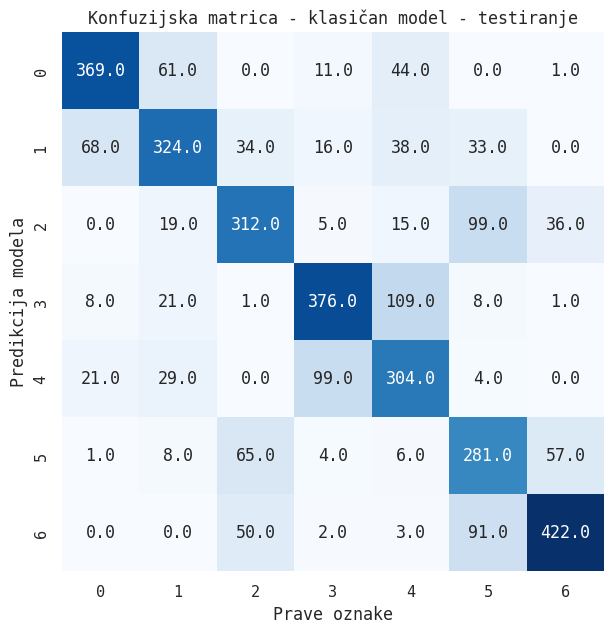

In [23]:
ct = pd.crosstab(y_preds,  y_true, rownames=["Predikcija modela"], colnames=["Prave oznake"])
plt.figure(figsize=(7,7))
sns.heatmap(ct, cmap="Blues", annot=True, xticklabels="0123456", yticklabels="0123456", fmt=".1f", cbar=False)
plt.title("Konfuzijska matrica - klasičan model - testiranje",fontproperties=font, fontsize=12)
plt.savefig('../images/confusion_matrix_bench_test.png',dpi=300, bbox_inches = 'tight')

plt.show()

In [24]:
out_array = np.array(out)

max_probs = (np.max(out_array, axis=1), np.argmax(out_array, axis=1))

bench_test = pd.DataFrame()
bench_test['Vjerojatnost'] = max_probs[0]
bench_test['Predikcija'] = max_probs[1]
bench_test['Oznaka'] = y_true
bench_test['ID'] = galaxy_ids

bench_test['Correct'] = np.where(bench_test['Predikcija'] == bench_test['Oznaka'], 1, 0)

print((sum(bench_test['Correct'])/bench_test.shape[0])*100)

69.09722222222221


In [27]:
bench_test.to_csv("../output/bench_test_bench.csv", index=False)


In [25]:
bench_test.head()

,Vjerojatnost,Predikcija,Oznaka,ID,Correct
0,0.896750,6,6.0,129469,1
1,0.820891,4,4.0,119388,1
2,0.872357,4,4.0,284459,1
3,0.970880,3,3.0,153665,1
4,0.774043,1,1.0,40401,1


In [18]:
import datap_efficient_runs as drun
import model_train_runs as trrun
from labeling_system import *
import cvt_OHE_full_att as cvt

In [26]:
torch.cuda.empty_cache()
gc.collect()

6136

---

In [20]:
train_dl_run1, valid_dl_run1, test_dl_run1, train_coarse1, valid_coarse1, test_coarse1 = drun.create_dali_iterators(traino, valido, testo, hard_run1_conf, bs)

In [21]:
torch.cuda.empty_cache()
gc.collect()

97

In [22]:
model_path = '../output/run1_02/model_RUN_01_full_final_02_epoch32.pth'
gmorph_model1 = cvt.CvT_cyclic(embed_size, 3, hint=False)
state_dict = torch.load(model_path)      

# Convert all parameters to half precision and move to device
for key in state_dict:
    if state_dict[key].dtype == torch.float32:
        state_dict[key] = state_dict[key].half()
    state_dict[key] = state_dict[key].to(device)
        
gmorph_model1.load_state_dict(state_dict)         
gmorph_model1 = gmorph_model1.half().to(device)  # Ensure model is in half precision and on device
gmorph_model1.eval()  

y_true1, y_preds1, out1, galaxy_ids1 = trb.test_model(test_dl_run1, gmorph_model1, device)

torch.cuda.empty_cache()
gc.collect()

189

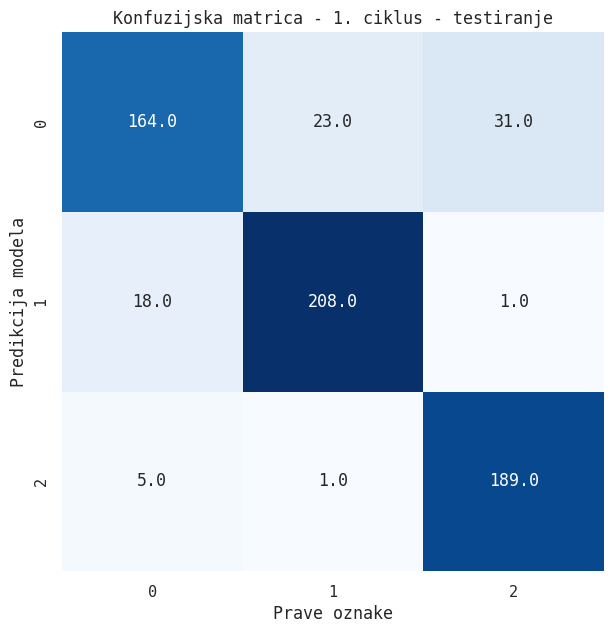

In [23]:
ct = pd.crosstab(y_preds1,  y_true1, rownames=["Predikcija modela"], colnames=["Prave oznake"])
plt.figure(figsize=(7,7))
sns.heatmap(ct, cmap="Blues", annot=True, xticklabels="012", yticklabels="012", fmt=".1f", cbar=False)
plt.title("Konfuzijska matrica - 1. ciklus - testiranje",fontproperties=font, fontsize=12)
plt.savefig('../images/confusion_matrix_run1_test.png',dpi=300, bbox_inches = 'tight')

plt.show()

In [24]:
out_array1 = np.array(out1)

max_probs1 = (np.max(out_array1, axis=1), np.argmax(out_array1, axis=1))

bench_test1 = pd.DataFrame()
bench_test1['Vjerojatnost'] = max_probs1[0]
bench_test1['Predikcija'] = max_probs1[1]
bench_test1['Oznaka'] = y_true1
bench_test1['ID'] = galaxy_ids1

bench_test1['Correct'] = np.where(bench_test1['Predikcija'] == bench_test1['Oznaka'], 1, 0)

print((sum(bench_test1['Correct'])/bench_test1.shape[0])*100)

87.65625


In [25]:
bench_test1.head()

,Vjerojatnost,Predikcija,Oznaka,ID,Correct
0,0.594876,0,2.0,122726,0
1,0.680653,2,2.0,78440,1
2,0.954822,1,1.0,220890,1
3,0.992954,0,0.0,190369,1
4,0.920567,2,2.0,81266,1


In [26]:
torch.cuda.empty_cache()
gc.collect()

2930

In [27]:
train_dl_run2, valid_dl_run2, test_dl_run2, train_coarse2, valid_coarse2, test_coarse2 = drun.create_dali_iterators(traino, valido, testo, hard_run2_conf, bs, previous=train_coarse1)

In [28]:
torch.cuda.empty_cache()
gc.collect()

97

In [ ]:
model_path = '../output/run2_02/model_RUN_02_full_final_02_epoch32.pth'
gmorph_model2 = cvt.CvT_cyclic(embed_size, 7, hint=True)
state_dict = torch.load(model_path)      

# Convert all parameters to half precision and move to device
for key in state_dict:
    if state_dict[key].dtype == torch.float32:
        state_dict[key] = state_dict[key].half()
    state_dict[key] = state_dict[key].to(device)
        
gmorph_model2.load_state_dict(state_dict)         
gmorph_model2 = gmorph_model2.half().to(device)  # Ensure model is in half precision and on device
gmorph_model2.eval()  

y_true2, y_preds2, out2, galaxy_ids2 = trb.test_model(test_dl_run2, gmorph_model2, device)

torch.cuda.empty_cache()
gc.collect()

OutOfMemoryError: CUDA out of memory. Tried to allocate 2.35 GiB. GPU 0 has a total capacity of 22.19 GiB of which 1.93 GiB is free. Process 582677 has 20.25 GiB memory in use. Of the allocated memory 14.62 GiB is allocated by PyTorch, and 331.55 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
ct = pd.crosstab(y_preds2,  y_true2, rownames=["Predikcija modela"], colnames=["Prave oznake"])
plt.figure(figsize=(7,7))
sns.heatmap(ct, cmap="Blues", annot=True, xticklabels="0123456", yticklabels="0123456", fmt=".1f", cbar=False)
plt.title("Konfuzijska matrica - 2. Ciklus - testiranje",fontproperties=font, fontsize=12)
plt.savefig('../images/confusion_matrix_run2_test.png',dpi=300, bbox_inches = 'tight')

plt.show()

In [ ]:
out_array2 = np.array(out2)

max_probs2 = (np.max(out_array2, axis=1), np.argmax(out_array2, axis=1))

bench_test2 = pd.DataFrame()
bench_test2['Vjerojatnost'] = max_probs2[0]
bench_test2['Predikcija'] = max_probs2[1]
bench_test2['Oznaka'] = y_true2
bench_test2['ID'] = galaxy_ids2

bench_test2['Correct'] = np.where(bench_test2['Predikcija'] == bench_test2['Oznaka'], 1, 0)

print((sum(bench_test2['Correct'])/bench_test2.shape[0])*100)

In [ ]:
cvtb.cvt_attention_map(gmorph_model1, test_dl_run1, device='cuda', gxy_labels=['E', 'S', 'Se'], dest_dir='../output/attention_maps_paper/', sel_gal_ids=[149229, 193214, 159901, 190265])
torch.cuda.empty_cache()
gc.collect()

In [ ]:
cvtb.cvt_attention_map(gmorph_model, test_dl_run2, device='cuda', gxy_labels=['Er', 'Ei', 'Ec', 'S', 'SB', 'Seb', 'Sen'], dest_dir='../output/attention_maps_paper/', sel_gal_ids=[266344, 238981, 12654, 171346])
torch.cuda.empty_cache()
gc.collect()

In [ ]:
cvtb.cvt_attention_map(gmorph_model, test_iter, device='cuda', gxy_labels=['Er', 'Ei', 'Ec', 'S', 'SB', 'Seb', 'Sen'], dest_dir='../output/attention_maps_paper/', sel_gal_ids=[266344, 238981, 12654, 171346])
torch.cuda.empty_cache()
gc.collect()